In [ ]:
#Task 2: Predicting customer buying behaviour

In [25]:
#Import all libraries
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

In [26]:
df = pd.read_csv(r'C:\Users\edeng\OneDrive\Documents\dataset BA.csv', encoding='latin_1')

In [27]:
X= df.drop(columns=['booking_complete'])
y= df['booking_complete']  

ACCURACY:  85.46000000000001
AUC score:  0.5527016774370659
purchase_lead            0.193248
route                    0.149572
flight_hour              0.141427
length_of_stay           0.125556
booking_origin           0.108908
flight_day               0.090316
flight_duration          0.073445
num_passengers           0.047872
wants_in_flight_meals    0.022422
wants_preferred_seat     0.016829
wants_extra_baggage      0.015837
sales_channel            0.012916
trip_type                0.001651
dtype: float64


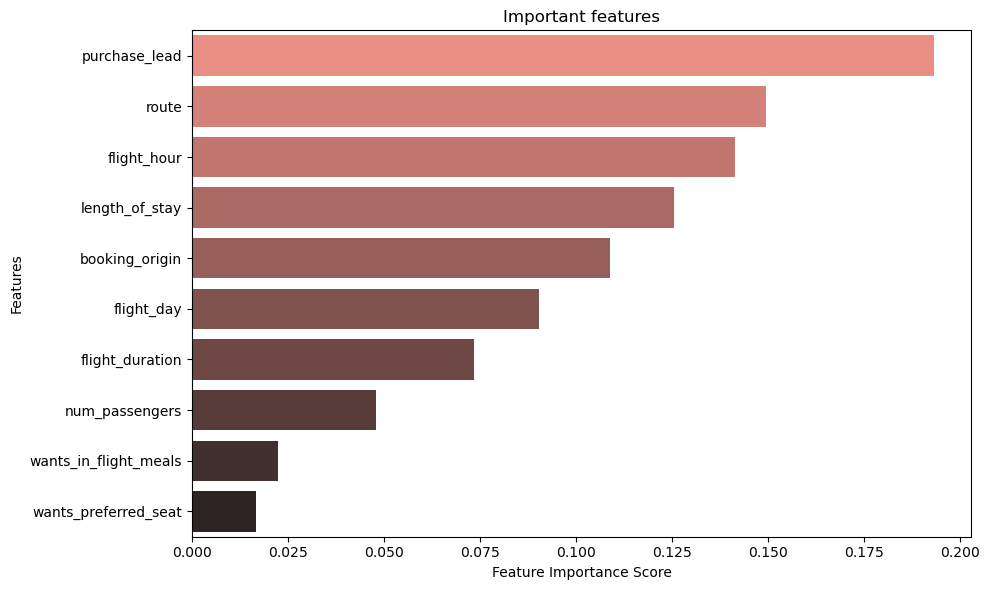

In [28]:
# Changing object dtype to int dtype
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# One-hot encoding
X_encoded = pd.get_dummies(X)
X_scaled = scale(X_encoded)

# Split data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=1)

# Create and fit the RandomForestClassifier
forest_model = RandomForestClassifier(random_state=1)
forest_model.fit(X_train, y_train)

# Predict on the validation set
preds = forest_model.predict(X_val)

# Calculate and print accuracy and AUC score
accuracy = accuracy_score(y_val, preds) * 100
auc_score = roc_auc_score(y_val, preds)

print('ACCURACY: ', accuracy)
print('AUC score: ', auc_score)

# Calculate and display feature importances
feature_scores = pd.Series(forest_model.feature_importances_, index=X_encoded.columns).sort_values(ascending=False)
print(feature_scores)

top_n = 10 
top_features = feature_scores.head(top_n)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_features.values, y=top_features.index, palette='dark:salmon_r')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Important features')
plt.tight_layout()
plt.show()
